In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
DF=pd.read_csv('FINAL_DSE_DATA.csv')
DF

,molecule_chembl_id,canonical_smiles,standard_value,standard_units,MOLECULAR WEIGHT,PSA,logP,HBA,HBD
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,nM,281.271,87.20,1.89262,5.0,0.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,nM,415.589,37.38,3.81320,2.0,0.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,nM,421.190,55.84,2.66050,4.0,0.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,nM,293.347,37.38,3.63080,3.0,0.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,nM,338.344,80.52,3.53900,5.0,0.0
...,...,...,...,...,...,...,...,...,...
197,CHEMBL3809833,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccco3)C2=O)c1,50000.0,nM,444.490,69.97,5.88630,3.0,1.0
198,CHEMBL3809053,O=C(O)c1cccc(N2N=C(c3ccccc3)/C(=C/c3ccc(-c4ccc...,6700.0,nM,474.516,79.20,5.79830,4.0,1.0
199,CHEMBL3818028,CC(=O)N[C@@H](CC(N)=O)C(=O)N[C@@H](CO)C(=O)N[C...,20000.0,nM,496.605,143.14,1.73670,7.0,3.0
200,CHEMBL4208240,CC(C)C[C@H](NC(=O)OC1CCN(C(=O)OC(C)(C)C)CC1)C(...,5100.0,nM,474.580,150.98,-0.23880,7.0,3.0


In [4]:
x=DF["PSA"].values.reshape(-1,1)
y=DF["standard_value"].values.reshape(-1,1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,random_state=0)

In [6]:
#Ridge regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x,y)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [7]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-6.300491080144423e+26


In [8]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x,y)


C:\Users\sudha\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4903506037877204e+27, tolerance: 4.980742687589072e+23
  positive)
C:\Users\sudha\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.966074674904286e+28, tolerance: 1.1932985814735488e+25
  positive)
C:\Users\sudha\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.186488138134933e+28, tolerance: 1.2375697461976e+25
  positive)
C:\Users\sudha\anaconda3\envs\my-rdkit-env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWar

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [9]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 20}
-6.300492339382656e+26


In [12]:
x=DF["MOLECULAR WEIGHT"].values.reshape(-1,1)
y=DF["standard_value"].values.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,random_state=0)

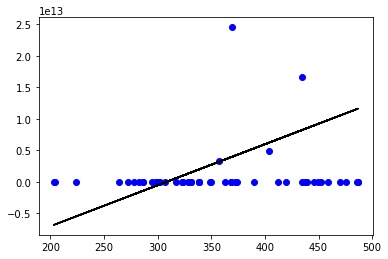

-1.1904716912162823e+23

In [14]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
regr = LinearRegression() 
regr.fit(X_train, Y_train) 
y_pred = regr.predict(X_test) 
plt.scatter(X_test, Y_test, color ='b') 
plt.plot(X_test, y_pred, color ='k') 
plt.show()
r2_score(x,y)